In [5]:
import cv2 #use BGR
import matplotlib.pyplot as plt
import numpy as np
import skimage as si #use RGB

## Chapter 1 Import Image

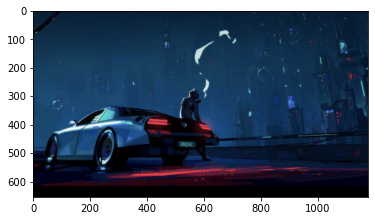

In [6]:
# import files as well as display the file
img=cv2.imread('/Users/livi/Git/Image-Processing/car.png',1)# 0 import as Grayscale, 1 import as colored picture
plt.imshow(img) #plt.imshow is RGB channel
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()
#cv2.waitKey(5000) # ms we will wait, 0 means infinite, openCV understand BGR format 
#cv2.destroyAllWindows()

#save image
#cv2.imwrite('test.png',img)
#plt.imsave('name',file)

In [7]:
#Reading proprietary images in python
# need to install new libraries: eg. pip install czifile
#img=czifile.imread('filename')
#Time seeries, scenes, channels, y,x,z,RGB

In [ ]:
#import video and show
cap=cv2.VideoCapture('/Users/livi/Git/Image-Processing/openCV project/ND 0 1S FOCAL 50 MEH 80S SERI dISTANCE25 NOn2 2 (convert-video-online.com).mp4')
while True:
    success,img=cap.read()
    plt.imshow(img)
    if cv2.waitKey(1) & 0xFF==ord('q'):
        break

In [ ]:
#use webcam and show
cap=cv2.VideoCapture(0)
cap.set(3, 640) #height of the image
cap.set(4,480) #width of the image
cap.set(10,100)# brightness
while True:
    success,img=cap.read()
    cv2.imshow('video',img)
    if cv2.waitKey(1) & 0xFF==ord('q'):
        break

In [8]:
#Convert image to numebrs
img2=si.img_as_float(img)
img3=img.astype(np.float_)
img_8bit=si.img_as_ubyte(img)
print(*[img2[0],img3[0],img_8bit[0]],sep='\n')

[[0.20784314 0.12156863 0.03137255]
 [0.20784314 0.12156863 0.03137255]
 [0.20784314 0.12156863 0.03137255]
 ...
 [0.19215686 0.10588235 0.02352941]
 [0.19215686 0.10588235 0.02352941]
 [0.19215686 0.10588235 0.02352941]]
[[53. 31.  8.]
 [53. 31.  8.]
 [53. 31.  8.]
 ...
 [49. 27.  6.]
 [49. 27.  6.]
 [49. 27.  6.]]
[[53 31  8]
 [53 31  8]
 [53 31  8]
 ...
 [49 27  6]
 [49 27  6]
 [49 27  6]]


## Chapter 2 Basic Function


In [9]:
img=cv2.imread('/Users/livi/Git/Image-Processing/car.png')

<ipython-input-10-6eddc34929f0>:10: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  img_Blur_ski=filters.gaussian(img,sigma=3)


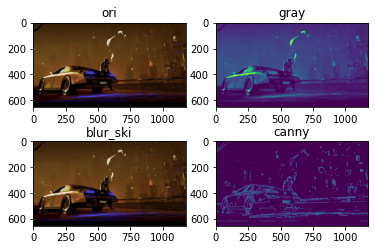

In [10]:
#Conver the color
img_Gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.subplot(121);plt.imshow(img)
plt.subplot(122);plt.imshow(img_Gray)

#Blur the image
img_Blur=cv2.GaussianBlur(img,(3,3),0)#need to be odd number

from skimage import filters
img_Blur_ski=filters.gaussian(img,sigma=3)

#detect edge (Canny Edge detector)
Img_Canny=cv2.Canny(img,100,100) #threshold


plt.subplot(221);plt.imshow(img);plt.title('ori')
plt.subplot(222);plt.imshow(img_Gray);plt.title('gray')
plt.subplot(223);plt.imshow(img_Blur);plt.title('blur_ski')
plt.subplot(224);plt.imshow(Img_Canny);plt.title('canny')
plt.show()


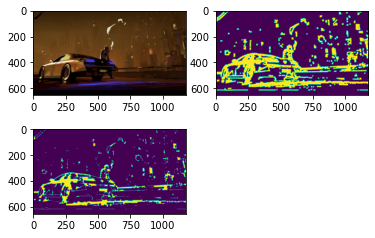

In [11]:
# dialation: thincking the line (mostly use numpy)
kernal=np.ones((5,5),np.uint8)# kernal, matrix the size and values, all have 1, but need size; unit8: the value is from 5 to 255
img_Dilation=cv2.dilate(Img_Canny,kernal,iterations=2) #iteration determine the thickness


#erode: make it thinner
img_eroded=cv2.erode(img_Dilation,kernal, iterations=2)

plt.subplot(221);plt.imshow(img)
plt.subplot(222);plt.imshow(img_Dilation)
plt.subplot(223);plt.imshow(img_eroded)
plt.show()


## Chpater 2.1 Unsharp mask (image Filtering)


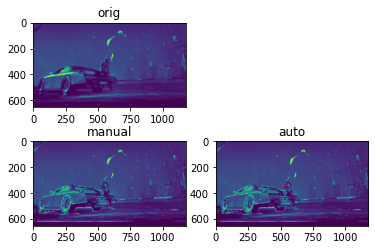

In [12]:
#unsharp image=original+ amount*(original-blured)=original(1+amount)-amount*blured
img=cv2.imread('/Users/livi/Git/Image-Processing/car.png',0)
img=img.astype(np.float64) # Without this message, the unsharpen methord would have different results.
img_Blur=cv2.GaussianBlur(img,(0,0),3)
n=0.8

img_unsharpen=img*(1+n)-n*img_Blur
img_weight = cv2.addWeighted(img, 1 + n, img_Blur, -1*n, 0.0) # im1 = im + 3.0*(im - im_blurred)  dst=α⋅src1+β⋅src2+γ (src1, alpha, src2, beta, 0.0) seems alpha only from 0 to 1?

plt.subplot(2,2,1);plt.imshow(img);plt.title('orig');
plt.subplot(2,2,3);plt.imshow(img_unsharpen.astype(np.uint8));plt.title('manual')
plt.subplot(2,2,4);plt.imshow(img_weight.astype((np.uint8)));plt.title('auto')
plt.show()
#sum(sum((img_weight-img_unsharpen)))

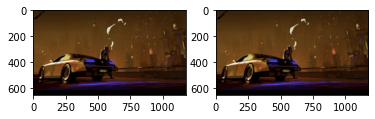

In [15]:
# Denoising using Gaussian filter
# most of the denoising method only works with gray scale image
# electronic noise give salt and pepper noise and it is hard to remove
img=cv2.imread('/Users/livi/Git/Image-Processing/car.png')
img_GauBlur=cv2.GaussianBlur(img,(5,5),0, borderType=cv2.BORDER_CONSTANT)


plt.subplot(1,2,1);plt.imshow(img)
plt.subplot(1,2,2);plt.imshow(img_GauBlur)
plt.show()

## Chapter3 Resizing and Crop

-----> x
|
|
|
V
y

In [16]:
img=cv2.imread('/Users/livi/Git/Image-Processing/car.png')

(654, 1178, 3)


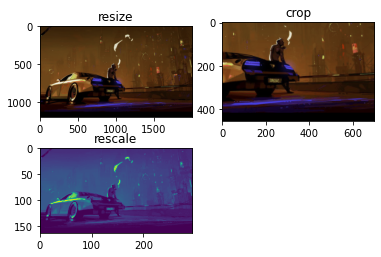

In [17]:
# check the size of the image
print(img.shape)

#resize the image
#img_Resize=cv2.resize(img,(600,500)) #width, height!!!!
img_Resize=cv2.resize(img,(2000,1200),interpolation=cv2.INTER_CUBIC) # need to fill the pixels when stretch the photos

#Cropping the image
img_Cropped=img[200:800,300:1000] #define height then width

#Rescale the image
from skimage.transform import rescale
img_rescale=rescale(img,1/4,anti_aliasing=False)

plt.subplot(221); plt.imshow(img_Resize); plt.title('resize')
plt.subplot(222); plt.imshow(img_Cropped);plt.title('crop')
plt.subplot(223); plt.imshow(img_rescale);plt.title('rescale')
plt.show()

## Chapter4 Shapes and Texts

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


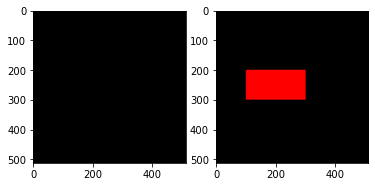

In [18]:
#  Change the color of the image
img=np.zeros((512,512,3))
img_copy=img.copy()
img_copy[200:300,100:300]=(255,0,0)

plt.subplot(121);plt.imshow(img)
plt.subplot(122);plt.imshow(img_copy)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


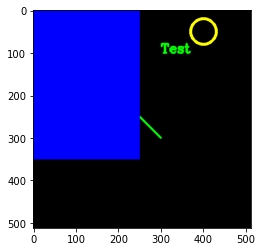

In [19]:
# Create line 
cv2.line(img,(0,0),(300,300),(0,255,0),3)# start, end, color, thickness

#Create Rectangle
cv2.rectangle(img,(0,0),(250,350),(0,0,255),cv2.FILLED) # use filled to fill the area

#create circle
cv2.circle(img,(400,50),30, (255,255,0),5)#center, radius, color, thickness

#put text
cv2.putText(img,'Test',(300,100),cv2.FONT_HERSHEY_COMPLEX,1,(0,150,0),3) #obj, text, location, font,scale, color, thickness



plt.imshow(img)
plt.show()

## Chapter5 Warp Perspective

In [20]:
img=cv2.imread('/Users/livi/Git/Image-Processing/car.png')

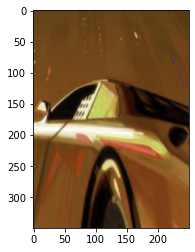

In [21]:
# perspective transformation, tilt to straight
width,height=250,350
pts1=np.float32([[50,219],[500,188],[154,482],[352,440]])
pts2=np.float32([[0,0],[width,0],[0,height],[width,height]])
matrix=cv2.getPerspectiveTransform(pts1,pts2)
img_output=cv2.warpPerspective(img,matrix,(width,height))
plt.imshow(img_output)

## Chapter 6 Joining Images (coudl not handle image with different parameter)

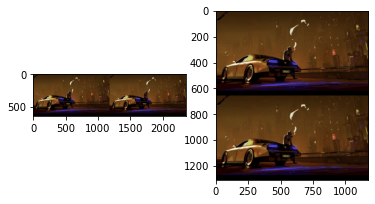

In [22]:
#put all picture in one window

# only work for one type of image
img_hor=np.hstack((img,img))
img_ver=np.vstack((img,img))

plt.subplot(1,2,1);plt.imshow(img_hor)
plt.subplot(1,2,2);plt.imshow(img_ver)
plt.show()

# for different size, need extra work....

In [ ]:
# work for different type (eg, gray and color image)

## Chapter 7 Color Detection (need to understand what is hue, saturation and value)

150 179 0 255 0 255


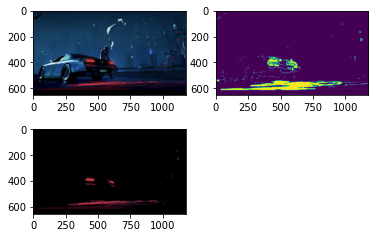

In [23]:
Hue_min=150 #0-179
Hue_max=179 #0-179
Sat_min=0 #0-255
Sat_max=255 #0-255
Val_min=0 #0-255
Val_max=255 #0-255

img=cv2.imread('/Users/livi/Git/Image-Processing/car.png')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
imgHSV=cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
h_min=Hue_min
h_max=Hue_max
s_min=Sat_min
s_max=Sat_max
v_min=Val_min
v_max=Val_max
print(h_min,h_max,s_min,s_max,v_min,v_max)

lower=np.array([h_min,s_min,v_min])
upper=np.array([h_max,s_max,v_max])
mask=cv2.inRange(imgHSV,lower, upper)
img_result=cv2.bitwise_and(img,img,mask=mask)

plt.subplot(2,2,1);plt.imshow(img)
#plt.subplot(2,2,2);plt.imshow('HSV',imgHSV)
plt.subplot(2,2,2);plt.imshow(mask)
plt.subplot(2,2,3);plt.imshow(img_result)
plt.show()

## Chapter8 Contour and Shape Detection

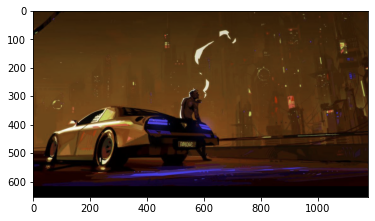

In [24]:
def getContours(img):
    contours,hierarchy=cv2.findContours(img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    for cnt in contours:
        area=cv2.contourArea(cnt)
        #print(area)
        if area>1000:
            cv2.drawContours(imgContour,cnt,-1,(255,0,0),3 )#-1 means all contours, thickness=3
            peri=cv2.arcLength(cnt,True)
            #print(peri)
            approx=cv2.approxPolyDP(cnt,0.02*peri, True)#polygon number
            #print(len(approx))
            objCor=len(approx)
            x,y,w,h=cv2.boundingRect(approx)
            cv2.rectangle(imgContour,(x,y),(x+w,y+h),(0,255,0),2)#start and ending point

            if objCor==3: ObjectType='Tri'
            elif objCor==4: 
                aspRatio=w/float(h)
                if aspRatio>0.95 and aspRatio<1.05:ObjectType='Square'
                else:ObjectType='Rectangle'
            elif objCor>4:ObjectType='circle'
            else:ObjectType='None'


            cv2.putText(imgContour,ObjectType,(x+(w//2)-10,y+(h//2)-10),cv2.FONT_HERSHEY_COMPLEX,2,(0,150,0),3)

img=cv2.imread('/Users/livi/Git/Image-Processing/car.png')
imgGray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
imgBlur=cv2.GaussianBlur(img,(7,7),1)
Img_Canny=cv2.Canny(imgBlur,50,50)
imgContour=img.copy()
getContours(Img_Canny)

imgBlank=np.zeros_like(img)



plt.imshow(imgContour)
plt.show()

## Chapter9 Facial detection
viola&Jones

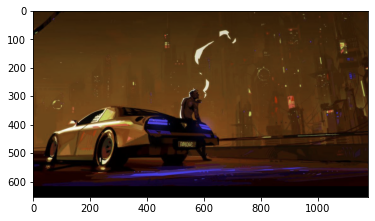

In [26]:
img=cv2.imread('/Users/livi/Git/Image-Processing/car.png')
imgGray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)


#cv2_base_dir = os.path.dirname(os.path.abspath(cv2.__file__))
faceCascade=cv2.CascadeClassifier('/opt/anaconda3/lib/python3.8/site-packages/cv2/data/haarcascade_frontalface_default.xml')
faces=faceCascade.detectMultiScale(imgGray,1.1,4)
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)

plt.imshow(img)

## Deep learning

In [27]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D
from keras.layers import MaxPooling2D, Flatten, Dropout

In [28]:
#Dense layers only
model=Sequential()
model.add(Dense(12,input_dim=8,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [36]:
# CNN-2-Dim
'''model=Sequential()

model.add(Conv2D(32,(3,3),input_shape=(28,28,1)),activation='relu')
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128,(3,3),input_shape=(28,28,1)),activation='relu')
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

#model.add(Flatten()) #flattern the convolutional image

#odel.add(Dense(128,activation='relu')
#model.add(Dense(128,activation='softmax')
#model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc']) #optimizer: help to minimize the loss because it is a classification problem, we use accuracy
'''

"model=Sequential()\n\nmodel.add(Conv2D(32,(3,3),input_shape=(28,28,1)),activation='relu')\nmodel.add(MaxPooling2D(pool_size=(2,2)))\nmodel.add(Dropout(0.2))\n\n\nmodel.add(Conv2D(64,(3,3),activation='relu'))\nmodel.add(MaxPooling2D(pool_size=(2,2)))\nmodel.add(Dropout(0.2))\n\nmodel.add(Conv2D(128,(3,3),input_shape=(28,28,1)),activation='relu')\nmodel.add(MaxPooling2D(pool_size=(2,2)))\nmodel.add(Dropout(0.2))\n\n#model.add(Flatten()) #flattern the convolutional image\n\n#odel.add(Dense(128,activation='relu')\n#model.add(Dense(128,activation='softmax')\n#model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc']) #optimizer: help to minimize the loss because it is a classification problem, we use accuracy\n"